In [1]:
library(ggplot2)
library(Seurat)
library(plyr)
library(dplyr)
library(Matrix)

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
aggr.data <- Read10X("MI_day30_CR6/filtered_feature_bc_matrix")

mid30.seurat <- CreateSeuratObject(aggr.data, min.cells = 10, min.features = 200, project = "MI-day30")
remove(aggr.data)

mid30.seurat[["percent.mt"]] <- PercentageFeatureSet(mid30.seurat, pattern = "^mt-")

cellSample <- sub(".*-(.*)","\\1", colnames(mid30.seurat))
cellSample <- replace(cellSample, cellSample=="1", "MI-day30")
table(cellSample)
mid30.seurat <- AddMetaData(mid30.seurat, cellSample, col.name = "Condition")


cellSample
MI-day30 
    7148 

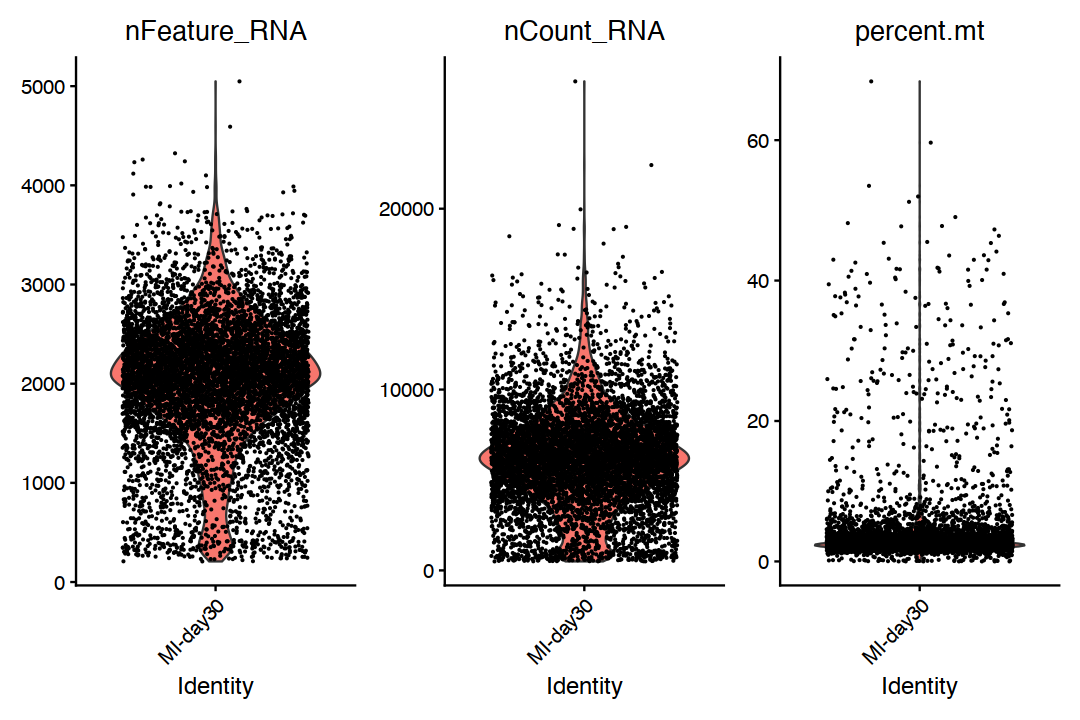

In [5]:
#Violin plot of QC metrics
options(repr.plot.width=9, repr.plot.height=6)
VlnPlot(mid30.seurat, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

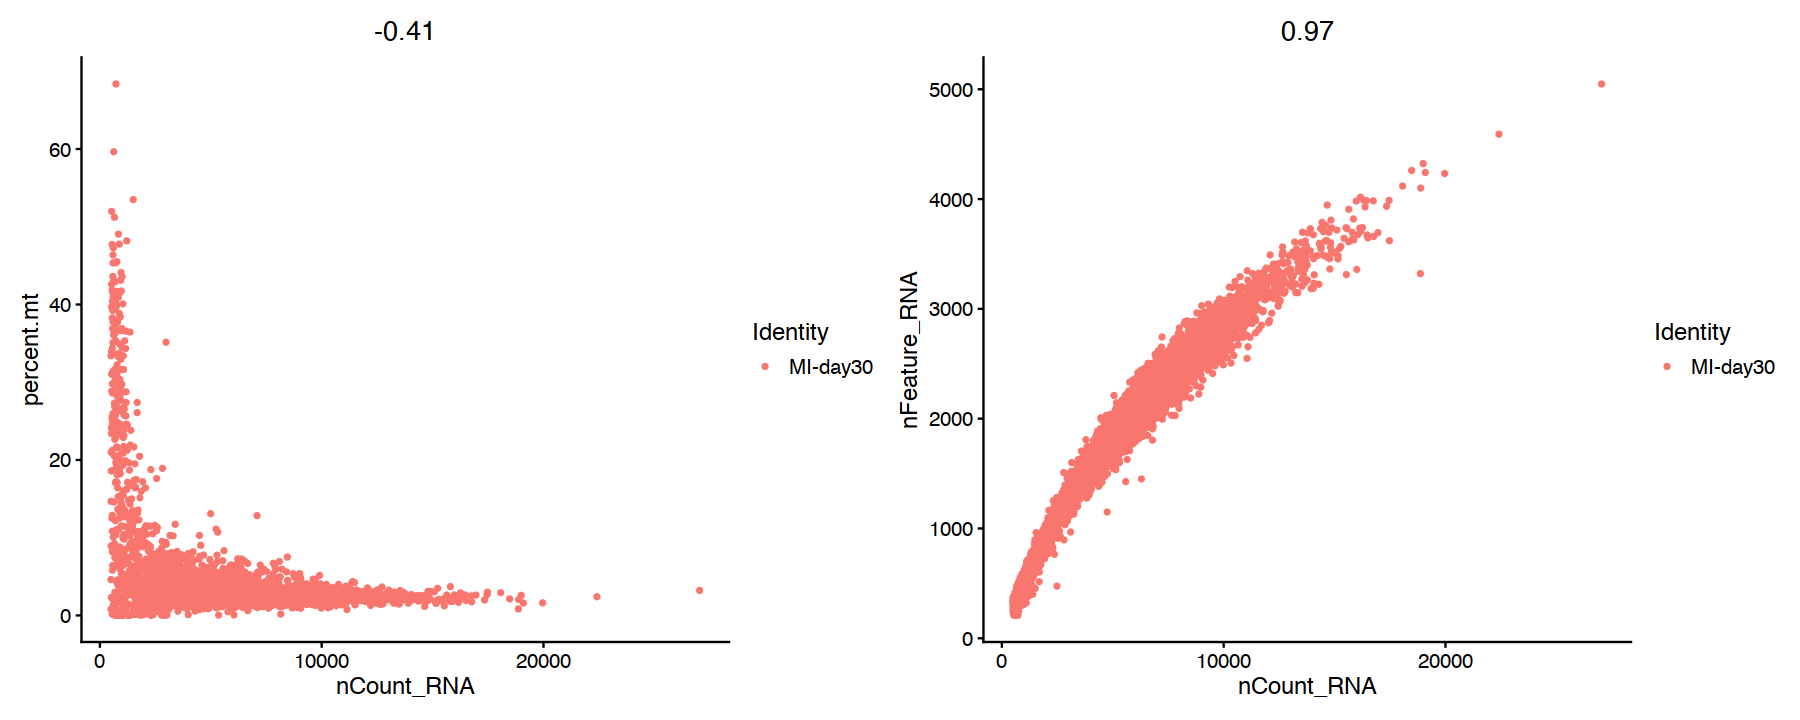

In [6]:
options(repr.plot.width=15, repr.plot.height=6)
plot1 <- FeatureScatter(mid30.seurat, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(mid30.seurat, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [7]:
mid30.seurat <- subset(mid30.seurat, subset = nFeature_RNA > 200 & nFeature_RNA < 3500 & percent.mt < 10 &
                         nCount_RNA > 500 & nCount_RNA < 13000)
dim(mid30.seurat)

# Normalise data
mid30.seurat <- NormalizeData(object = mid30.seurat, 
                              normalization.method = "LogNormalize", 
                              scale.factor = 10000)

# Find higly variable genes
mid30.seurat <- FindVariableFeatures(object = mid30.seurat, mean.function = "vst", nfeatures = 3000)

# Regress of unwanted variation
mid30.seurat <- ScaleData(mid30.seurat, vars.to.regress = c("nCount_RNA"),  verbose = TRUE)

mid30.seurat <- RunPCA(object = mid30.seurat, features = VariableFeatures(object = mid30.seurat), npcs=40)

## Clustering
mid30.seurat <- FindNeighbors(mid30.seurat, dims = 1:25)
mid30.seurat <- FindClusters(mid30.seurat, resolution = c( 0.4, 0.5, 0.6, 0.7))

### UMAP/t-SNE analysis
mid30.seurat <- RunUMAP(mid30.seurat, dims = 1:25)

Idents(mid30.seurat) <- mid30.seurat@meta.data$RNA_snn_res.0.6

[1] 14544  6731

Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  Smoc2, Sparcl1, Clec3b, Pla1a, Ms4a4d, Dpep1, Pcsk6, Lpl, Gsn, Gsta3 
	   Hsd11b1, Htra3, Lamb1, Nid1, Adamts5, S100a6, Abca8a, Gpx3, Lamc1, Gstm1 
	   G0s2, Vwa1, Tnxb, Ccnd1, Hspg2, Cd34, Ifi27l2a, Col15a1, Pcolce, Fbln2 
Negative:  Comp, Ecrg4, Dkk3, Fmod, Pdlim3, Sfrp2, Cd200, Clu, Fn1, Mdk 
	   Cthrc1, Id3, Csrp2, Mfap4, Ddah1, Nkain4, Angptl7, Cpe, Cst3, Cdc42ep3 
	   Tmem176b, Mgp, Atp1b1, Cpxm2, Acta2, Nr4a2, Tgfb3, Col8a2, Tcea3, Palld 
PC_ 2 
Positive:  Bgn, Comp, Cst3, Postn, Fibin, Col8a1, Fxyd6, Cilp, Ddah1, Meox1 
	   Aspn, Sparc, Mfap4, Frzb, Ecrg4, Ltbp2, Ccn2, Emp1, Igfbp7, Pdgfrl 
	   Itgbl1, Cthrc1, Serpinf1, Prelp, Rflnb, Dkk3, Ckb, Fmod, Col8a2, Pmepa1 
Negative:  Nkain4, Upk3b, Lrrn4, Gpm6a, Slc9a3r1, Wt1, C2, Upk1b, Clu, Krt19 
	   Adam33, C3, Efemp1, Pkhd1l1, Msln, Tmem151a, Esam, Aqp1, Pdlim4, Cxadr 
	   Rspo1, Gm49708, Atp1b1, Ptgs1, Cldn15, Lgals7, F11r, Myrf, Krt18, Krt7 
PC_ 3 


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6731
Number of edges: 227165

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8279
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6731
Number of edges: 227165

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8053
Number of communities: 7
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6731
Number of edges: 227165

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7883
Number of communities: 11
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6731
Number of edges: 227165

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7747
Number of communities: 10
Elapsed time: 0 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
16:21:37 UMAP embedding parameters a = 0.9922 b = 1.112

16:21:37 Read 6731 rows and found 25 numeric columns

16:21:37 Using Annoy for neighbor search, n_neighbors = 30

16:21:37 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:21:38 Writing NN index file to temp file /var/folders/2p/fzztw4ls58lcjyzm918ky5900000gn/T//Rtmp9c6XXh/file71bd24eb23ab

16:21:38 Searching Annoy index using 1 thread, search_k = 3000

16:21:39 Annoy recall = 100%

16:21:39 Commencing smooth kNN distance calibrat

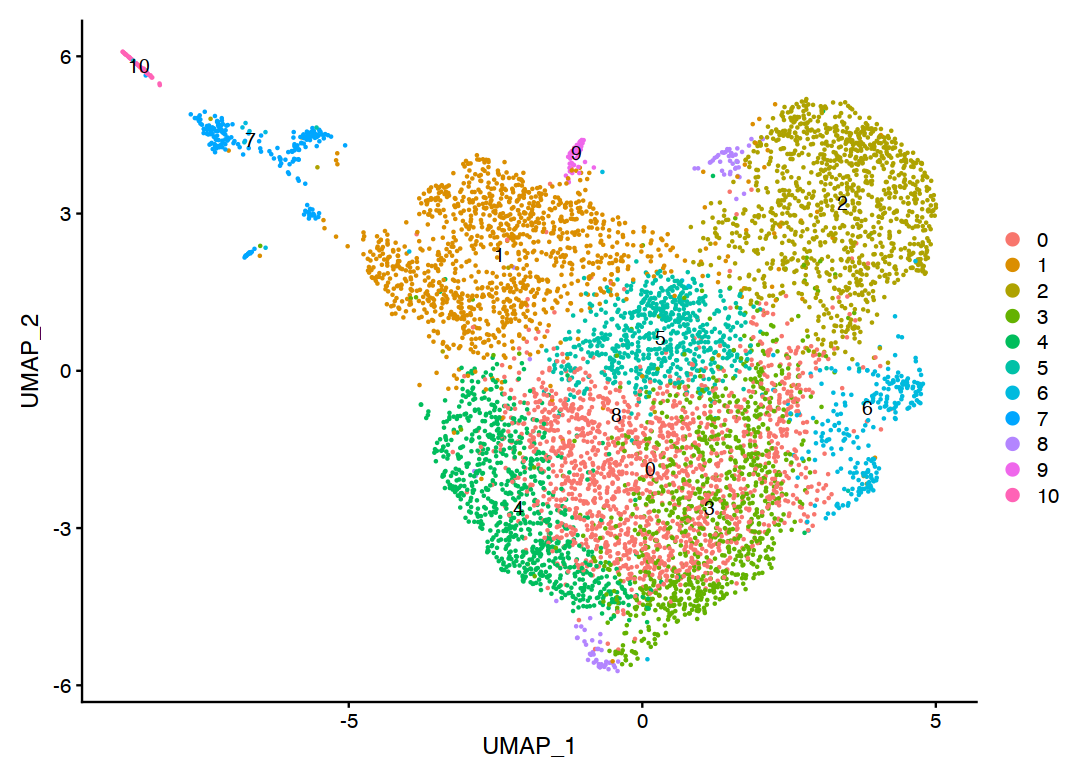

In [9]:
options(repr.plot.width=9, repr.plot.height=6.5)
DimPlot(mid30.seurat, reduction = "umap", label = TRUE)

# Doublet filtering

Visualise and filter doublets identified with Scrublet

[1] "Predicted singlets from Scrublet: 7144"
[1] "Overlap with filtered data: 6710"


[1] 6710

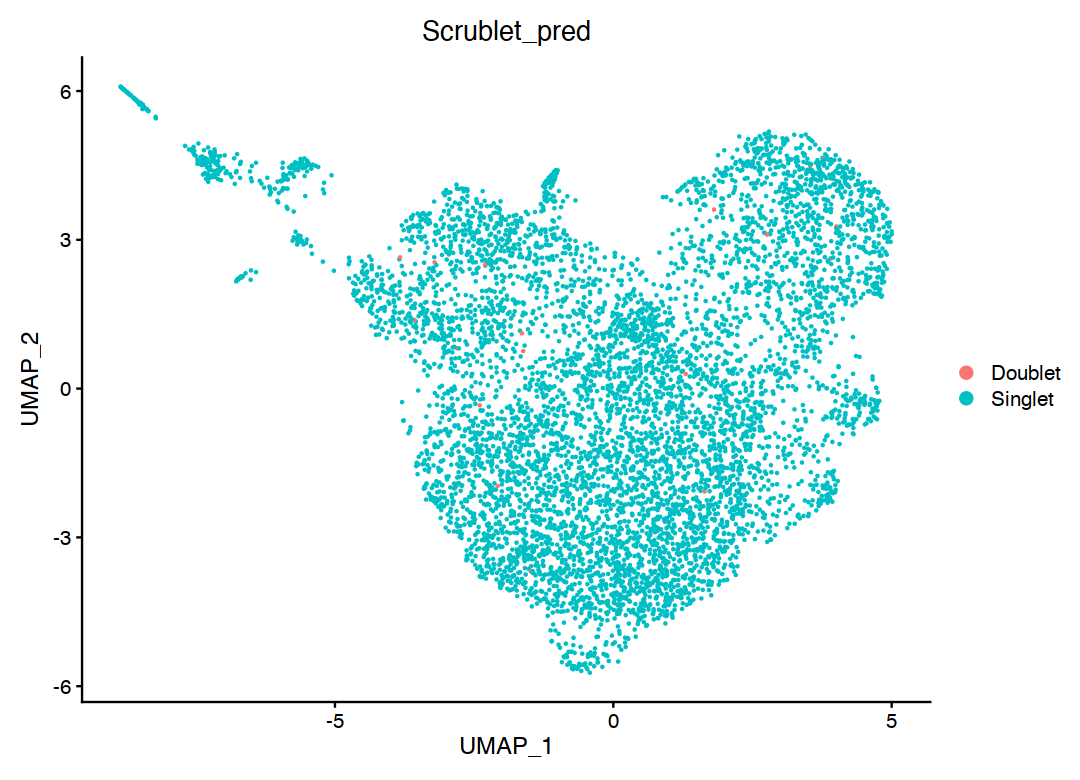

In [11]:
singlet.file <- "Scrublet/MI_day30_singlets.txt"

all.singlets <- readLines(singlet.file)

print(paste("Predicted singlets from Scrublet:", length(all.singlets)))
print(paste("Overlap with filtered data:", length(intersect(colnames(mid30.seurat), all.singlets))))
length(intersect(colnames(mid30.seurat), all.singlets))

scrublet.doublet <- ifelse(colnames(mid30.seurat) %in% all.singlets, "Singlet", "Doublet")
mid30.seurat@meta.data$Scrublet_pred <- scrublet.doublet

options(repr.plot.width=9, repr.plot.height=6.5)
DimPlot(mid30.seurat, group.by = "Scrublet_pred")

In [12]:
# Filter the Seurat object for singlets and re-run clustering analysis
mid30.seurat <- subset(mid30.seurat, Scrublet_pred == "Singlet")
dim(mid30.seurat)

# Normalise data
mid30.seurat <- NormalizeData(object = mid30.seurat, 
                              normalization.method = "LogNormalize", 
                              scale.factor = 10000)

# Find higly variable genes
mid30.seurat <- FindVariableFeatures(object = mid30.seurat, mean.function = "vst", nfeatures = 3000)

# Regress of unwanted variation
mid30.seurat <- ScaleData(mid30.seurat,  vars.to.regress = c("nCount_RNA"),  verbose = TRUE)

mid30.seurat <- RunPCA(object = mid30.seurat, features = VariableFeatures(object = mid30.seurat), npcs=50)

## Clustering
mid30.seurat <- FindNeighbors(mid30.seurat,  dims = 1:40)
mid30.seurat <- FindClusters(mid30.seurat, resolution = c( 0.6, 0.7, 0.8, 0.9, 1))

### UMAP/t-SNE analysis
mid30.seurat <- RunUMAP(mid30.seurat, dims = 1:30)


[1] 14544  6710

Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  Comp, Ecrg4, Dkk3, Fmod, Pdlim3, Sfrp2, Cd200, Clu, Fn1, Mdk 
	   Cthrc1, Csrp2, Id3, Mfap4, Ddah1, Nkain4, Angptl7, Cpe, Cdc42ep3, Cst3 
	   Tmem176b, Mgp, Atp1b1, Acta2, Cpxm2, Nr4a2, Tgfb3, Col8a2, Tcea3, Palld 
Negative:  Smoc2, Sparcl1, Clec3b, Pla1a, Ms4a4d, Dpep1, Pcsk6, Lpl, Gsn, Gsta3 
	   Hsd11b1, Htra3, Lamb1, Nid1, Adamts5, S100a6, Abca8a, Gpx3, Lamc1, Gstm1 
	   G0s2, Vwa1, Tnxb, Ccnd1, Hspg2, Cd34, Ifi27l2a, Pcolce, Col15a1, Fbln2 
PC_ 2 
Positive:  Nkain4, Upk3b, Lrrn4, Gpm6a, Slc9a3r1, Wt1, C2, Upk1b, Clu, Krt19 
	   Adam33, C3, Efemp1, Pkhd1l1, Msln, Tmem151a, Esam, Aqp1, Pdlim4, Cxadr 
	   Rspo1, Gm49708, Atp1b1, Ptgs1, Cldn15, Lgals7, F11r, Myrf, Krt18, Krt7 
Negative:  Bgn, Comp, Cst3, Postn, Fibin, Col8a1, Fxyd6, Cilp, Ddah1, Meox1 
	   Aspn, Sparc, Mfap4, Frzb, Ecrg4, Ltbp2, Ccn2, Emp1, Igfbp7, Pdgfrl 
	   Itgbl1, Cthrc1, Serpinf1, Prelp, Rflnb, Dkk3, Fmod, Ckb, Col8a2, Pmepa1 
PC_ 3 


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6710
Number of edges: 246059

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7893
Number of communities: 10
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6710
Number of edges: 246059

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7723
Number of communities: 11
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6710
Number of edges: 246059

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7566
Number of communities: 11
Elapsed time: 0 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6710
Number of edges: 246059

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7422
Number of communities: 13
Elapsed time: 0 seconds
Modularity Optim

16:28:23 UMAP embedding parameters a = 0.9922 b = 1.112

16:28:23 Read 6710 rows and found 30 numeric columns

16:28:23 Using Annoy for neighbor search, n_neighbors = 30

16:28:23 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:28:23 Writing NN index file to temp file /var/folders/2p/fzztw4ls58lcjyzm918ky5900000gn/T//Rtmp9c6XXh/file71bd1869af18

16:28:23 Searching Annoy index using 1 thread, search_k = 3000

16:28:24 Annoy recall = 100%

16:28:24 Commencing smooth kNN distance calibration using 1 thread

16:28:25 Initializing from normalized Laplacian + noise

16:28:25 Commencing optimization for 500 epochs, with 281802 positive edges

16:28:33 Optimization finished



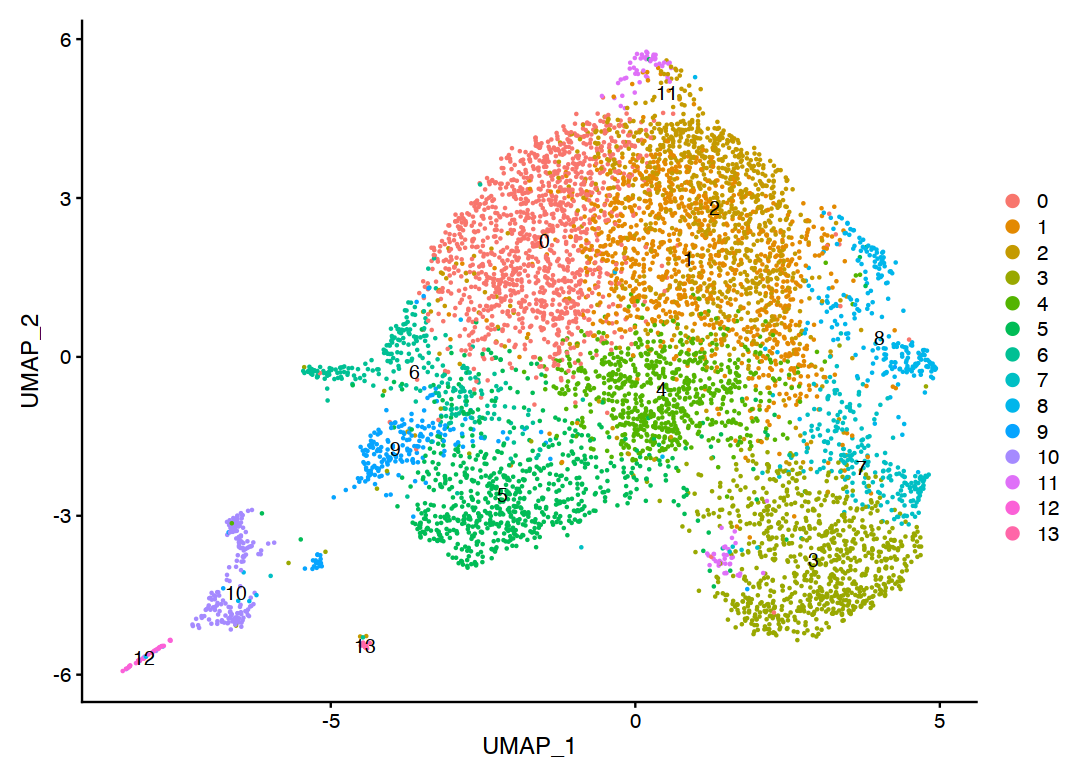

In [13]:
options(repr.plot.width=9, repr.plot.height=6.5)
Idents(mid30.seurat) <- mid30.seurat@meta.data$RNA_snn_res.1

DimPlot(mid30.seurat, reduction = "umap", label = TRUE)

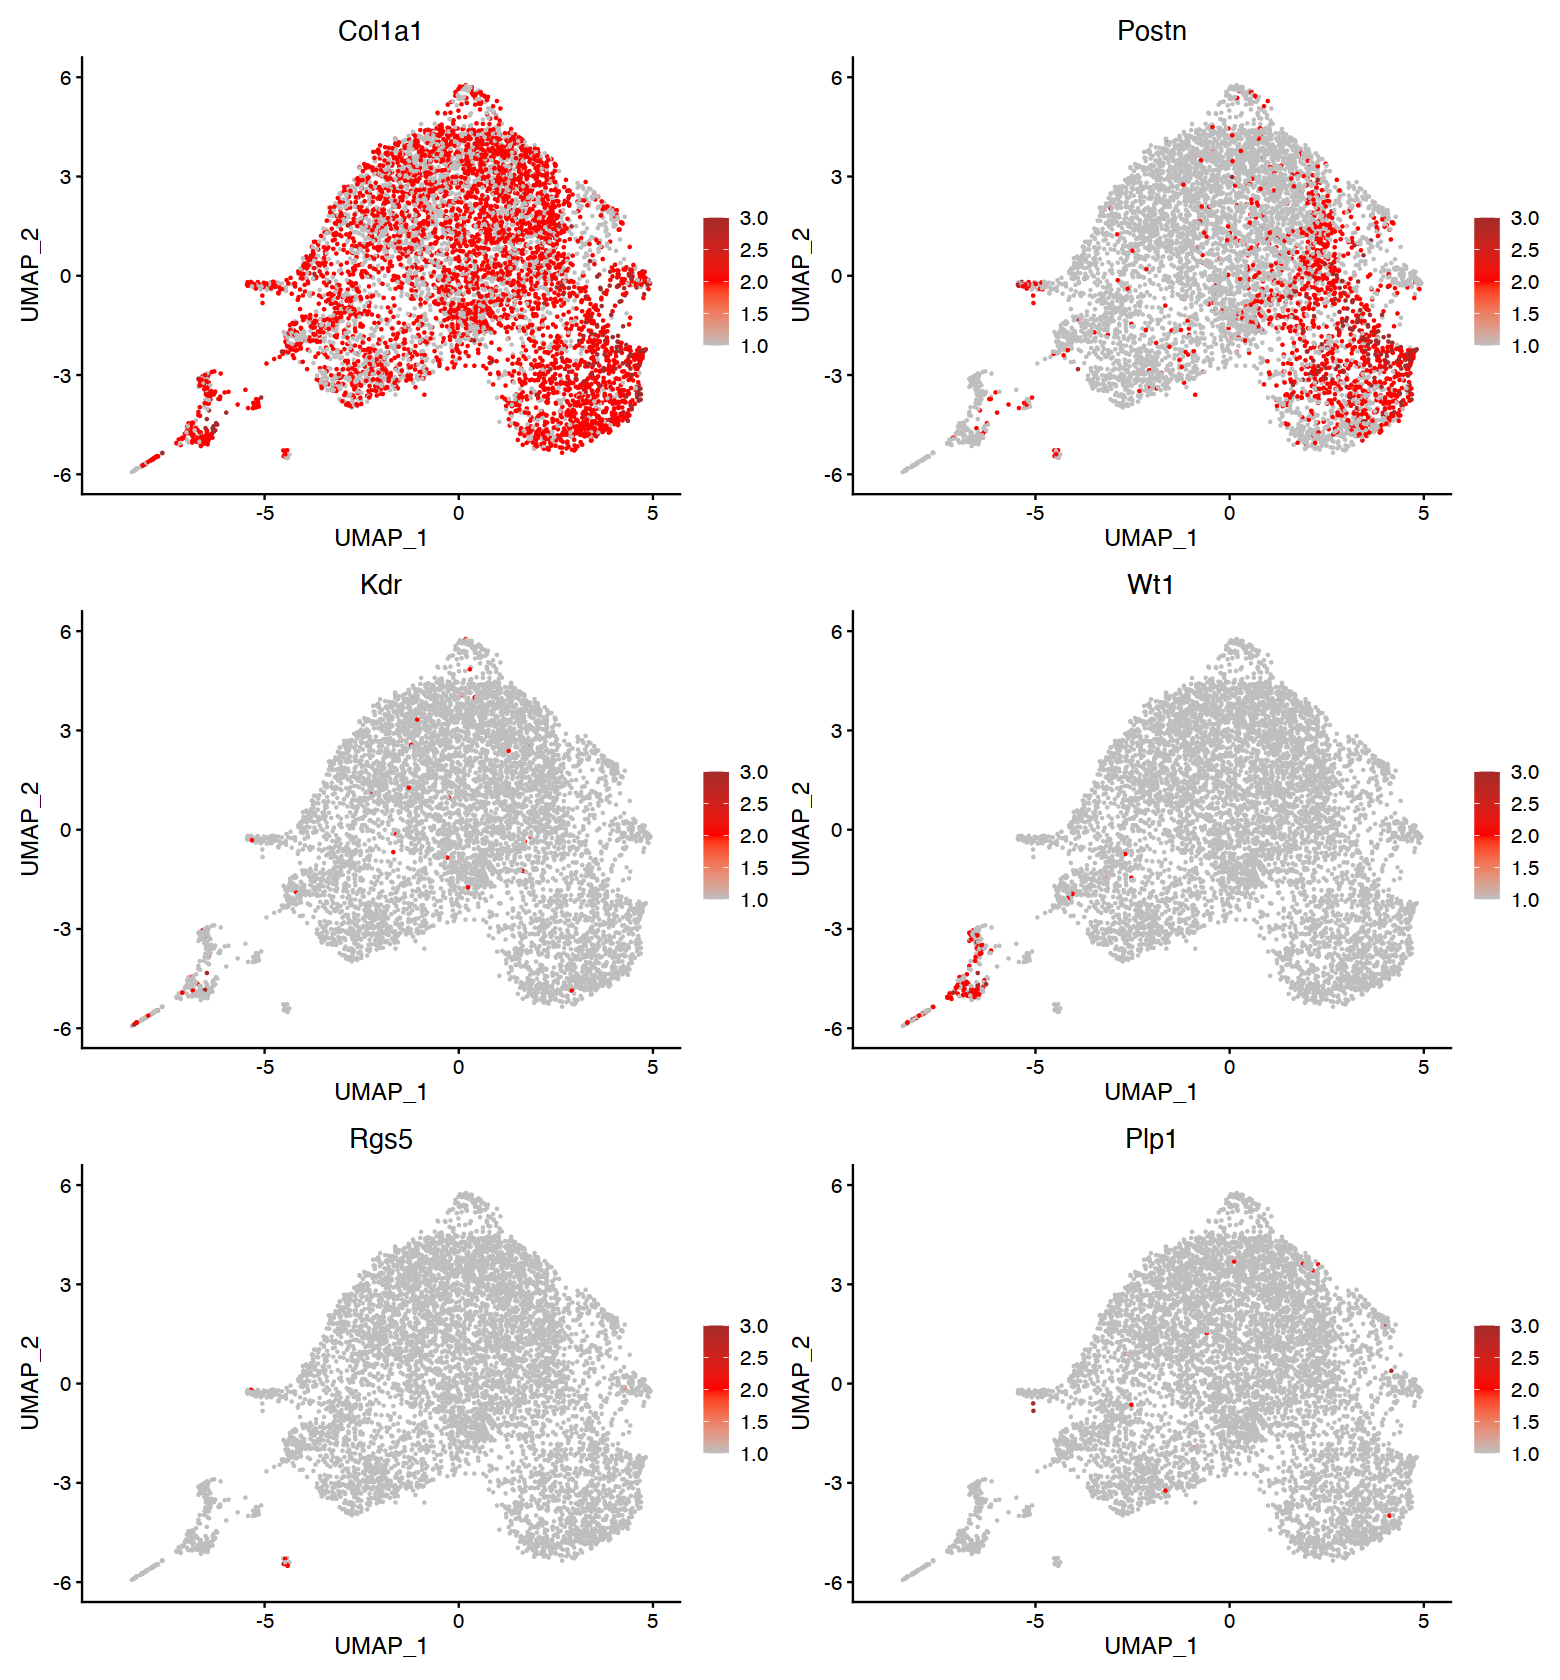

In [16]:
options(repr.plot.width=13, repr.plot.height=14)
FeaturePlot(mid30.seurat, c("Col1a1", "Postn", "Kdr", "Wt1", "Rgs5", "Plp1"), 
            cols = c("grey", "red", "brown"))

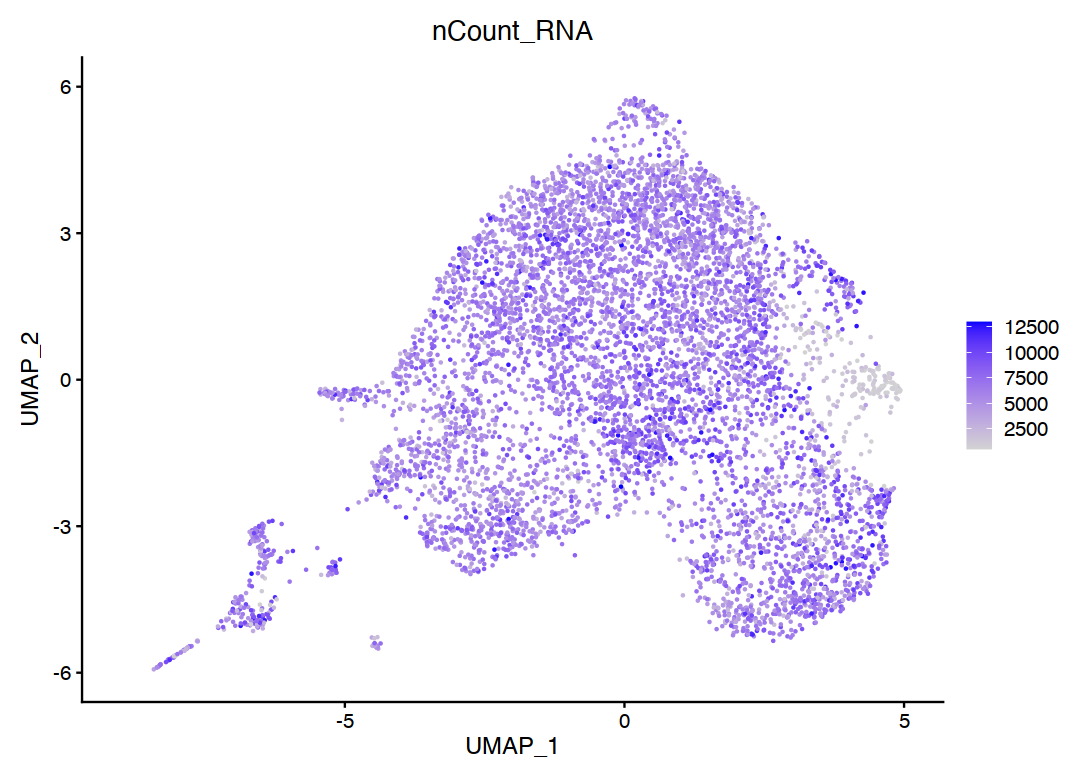

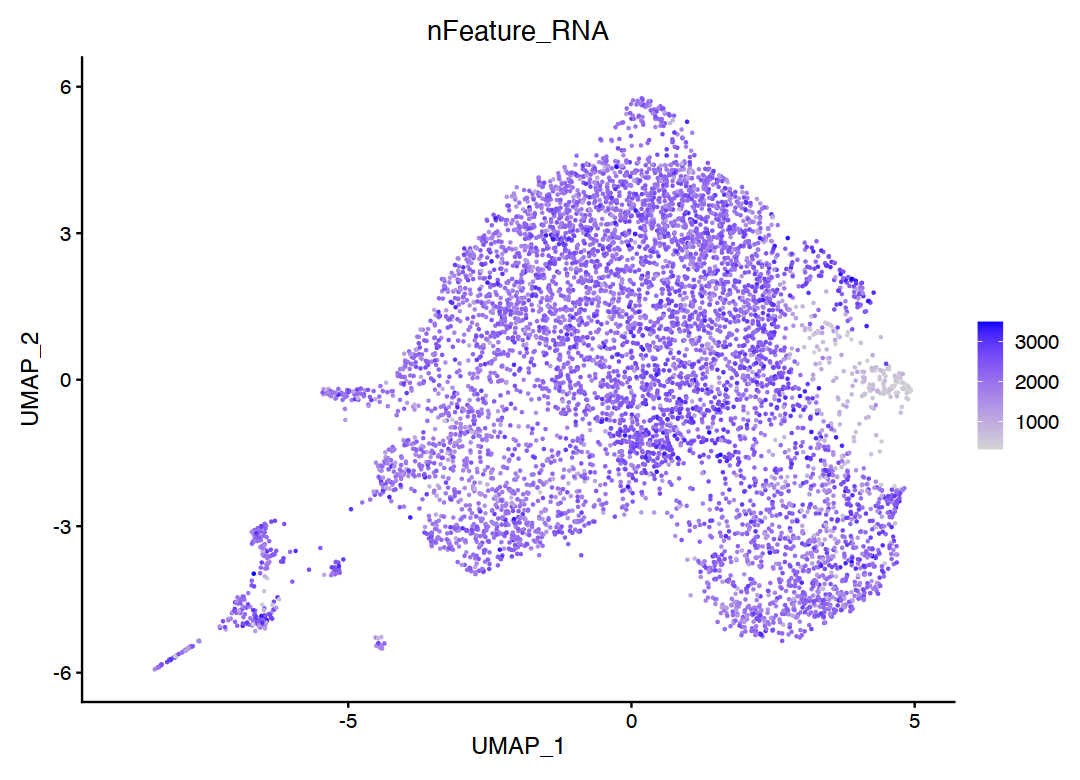

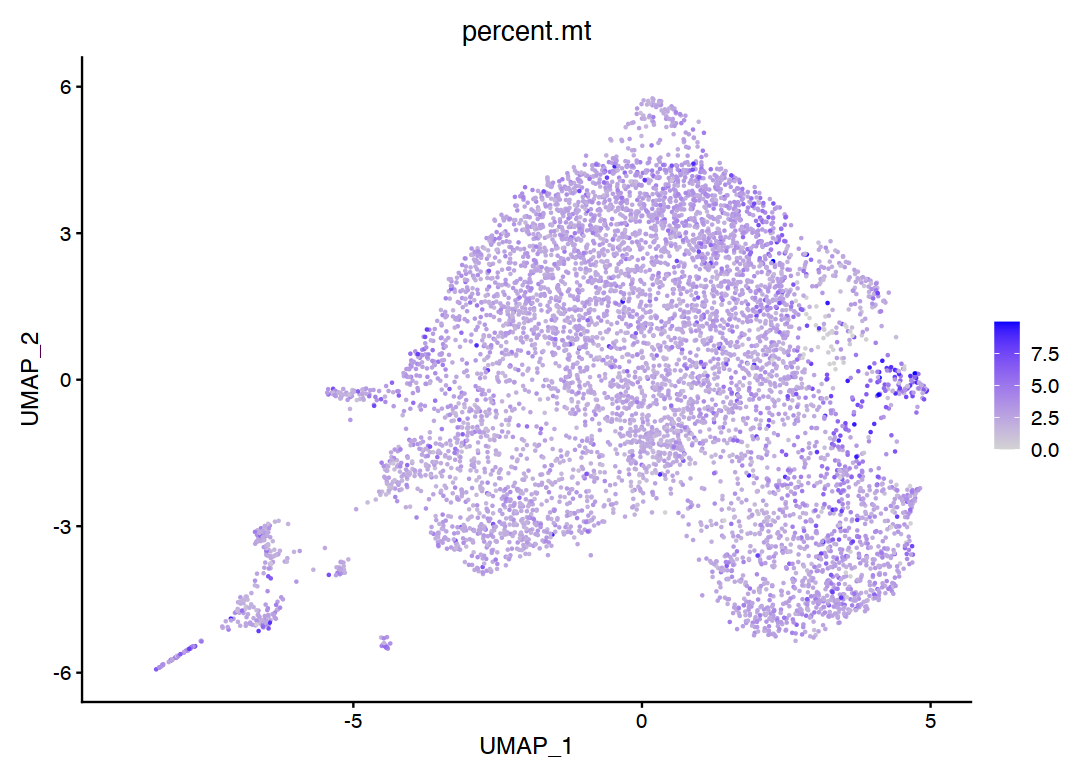

In [18]:
options(repr.plot.width=9, repr.plot.height=6.5)

FeaturePlot(mid30.seurat, "nCount_RNA")
FeaturePlot(mid30.seurat, "nFeature_RNA")
FeaturePlot(mid30.seurat, "percent.mt")

High confidence fibroblast clusters are 0, 1, 2, 3, 4, 5, 6, 7, 9 and 11.

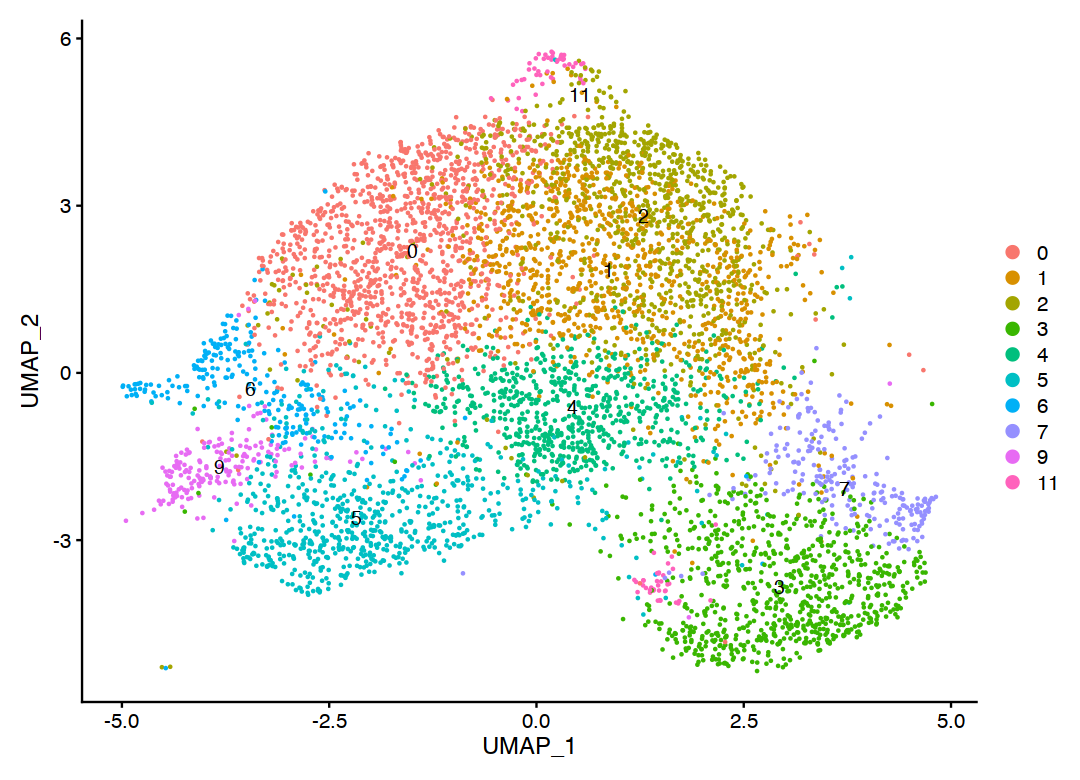

In [19]:
### Sub-select fibroblasts for subsequent downstream analysis

fibro.clusters <- c("0", "1", "2", "3", "4", "5", "6", "7", "9", "11")

mid30.fibroblasts <- subset(mid30.seurat, idents = fibro.clusters)

mid30.fibroblasts <- subset(mid30.fibroblasts, UMAP_1 > -5)

options(repr.plot.width=9, repr.plot.height=6.5)
DimPlot(mid30.fibroblasts, label = TRUE)

# Recluster subsetted fibroblasts

In [20]:
### Run reclustering based on selected fibroblasts

mid30.fibroblasts <- FindVariableFeatures(object = mid30.fibroblasts, 
                                          mean.function = "vst", nfeatures = 2000)

# Regress of unwanted variation
mid30.fibroblasts <- ScaleData(mid30.fibroblasts,  vars.to.regress = c("nCount_RNA"),  verbose = TRUE)

mid30.fibroblasts <- RunPCA(object = mid30.fibroblasts, features = VariableFeatures(object = mid30.fibroblasts), npcs=50)

## Clustering
mid30.fibroblasts <- FindNeighbors(mid30.fibroblasts, k.param = 30, dims = 1:30)
mid30.fibroblasts <- FindClusters(mid30.fibroblasts, resolution = c(0.7, 0.8, 0.9, 1, 1.2))

### UMAP/t-SNE analysis
mid30.fibroblasts <- RunUMAP(mid30.fibroblasts, dims = 1:30)


Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  Clec3b, Smoc2, Lpl, Dpep1, Pla1a, Ms4a4d, Sparcl1, S100a6, Gstm1, Gsta3 
	   Lamb1, Hsd11b1, Adamts5, Pcsk6, Tnxb, Gpx3, Nid1, Rarres2, Htra3, Abca8a 
	   Ifitm3, G0s2, Lamc1, Scara5, Gsn, Vwa1, Ifi205, Ccnd1, Ifi27l2a, Fbln2 
Negative:  Comp, Ecrg4, Cst3, Dkk3, Mfap4, Fmod, Ddah1, Cthrc1, Sfrp2, Cd200 
	   Fxyd6, Angptl7, Pdlim3, Col8a2, Postn, Ltbp2, Mdk, Id3, Fn1, Csrp2 
	   Mgp, Cpxm2, Cilp, Pdgfrl, Ccn2, Ccn5, Tgfb3, Ptn, Fbln1, Acta2 
PC_ 2 
Positive:  Mfap5, Crip1, Pi16, Cd248, Postn, Fstl1, Cd9, Cd34, Uqcc2, Tmsb4x 
	   Efhd1, Aspn, Igfbp6, Ly6c1, Crip2, Nbl1, Fbln2, Ckb, S100a10, Fbn1 
	   Anxa2, Capg, Ugp2, Uap1, Dbn1, Cavin3, Vcan, Ly6a, Cst6, S100a6 
Negative:  Apoe, Dpep1, Junb, Selenop, Mgp, Btg2, Cxcl1, Zfp36, Egr1, Gpx3 
	   Inmt, Cpxm1, Socs3, Il11ra1, Fmo2, Fos, Adm, Mt1, G0s2, Vcam1 
	   Gpm6b, Srpx, H3f3b, Nmb, Jun, Ccl19, Spon1, Sept4, Ifitm3, Hsd11b1 
PC_ 3 
Positive:  Nr4a1, Tmem100, 

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6186
Number of edges: 373687

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7356
Number of communities: 6
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6186
Number of edges: 373687

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7173
Number of communities: 8
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6186
Number of edges: 373687

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.7019
Number of communities: 8
Elapsed time: 1 seconds
Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6186
Number of edges: 373687

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.6859
Number of communities: 10
Elapsed time: 1 seconds
Modularity Optimize

16:49:27 UMAP embedding parameters a = 0.9922 b = 1.112

16:49:27 Read 6186 rows and found 30 numeric columns

16:49:27 Using Annoy for neighbor search, n_neighbors = 30

16:49:27 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

16:49:27 Writing NN index file to temp file /var/folders/2p/fzztw4ls58lcjyzm918ky5900000gn/T//Rtmp9c6XXh/file71bddda62c5

16:49:27 Searching Annoy index using 1 thread, search_k = 3000

16:49:28 Annoy recall = 100%

16:49:28 Commencing smooth kNN distance calibration using 1 thread

16:49:29 Initializing from normalized Laplacian + noise

16:49:29 Commencing optimization for 500 epochs, with 263092 positive edges

16:49:36 Optimization finished



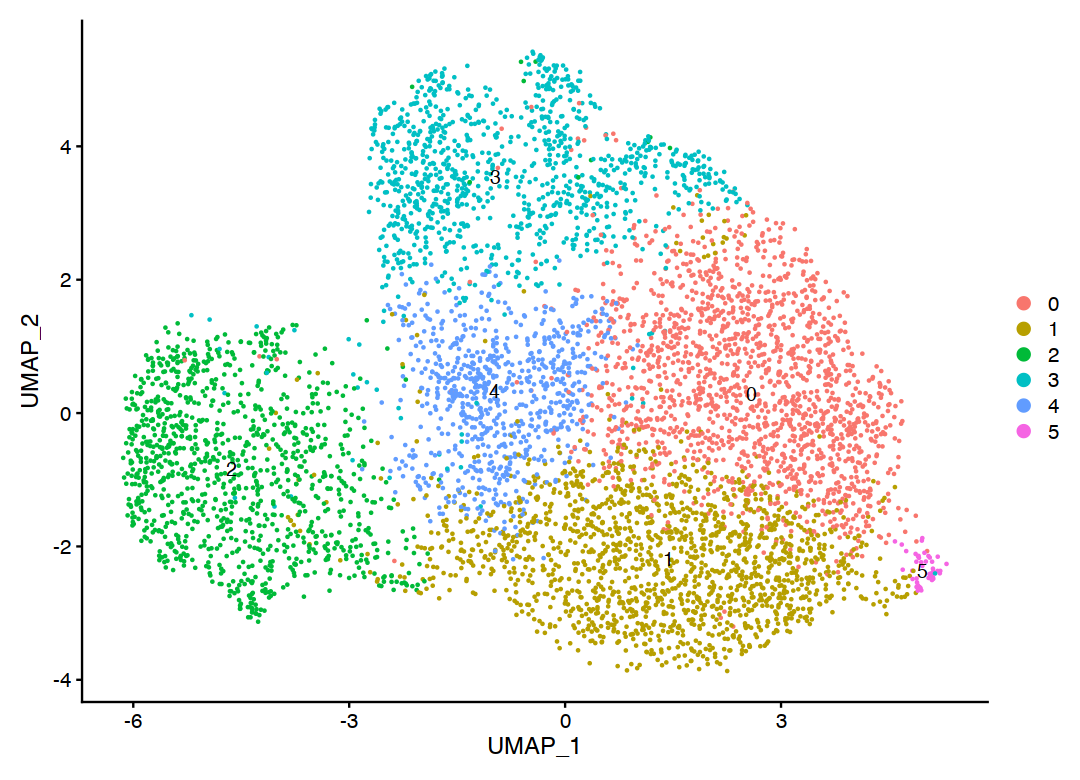

In [21]:
Idents(mid30.fibroblasts) <- mid30.fibroblasts@meta.data$RNA_snn_res.0.7

options(repr.plot.width=9, repr.plot.height=6.5)
DimPlot(mid30.fibroblasts, reduction = "umap", label = TRUE)

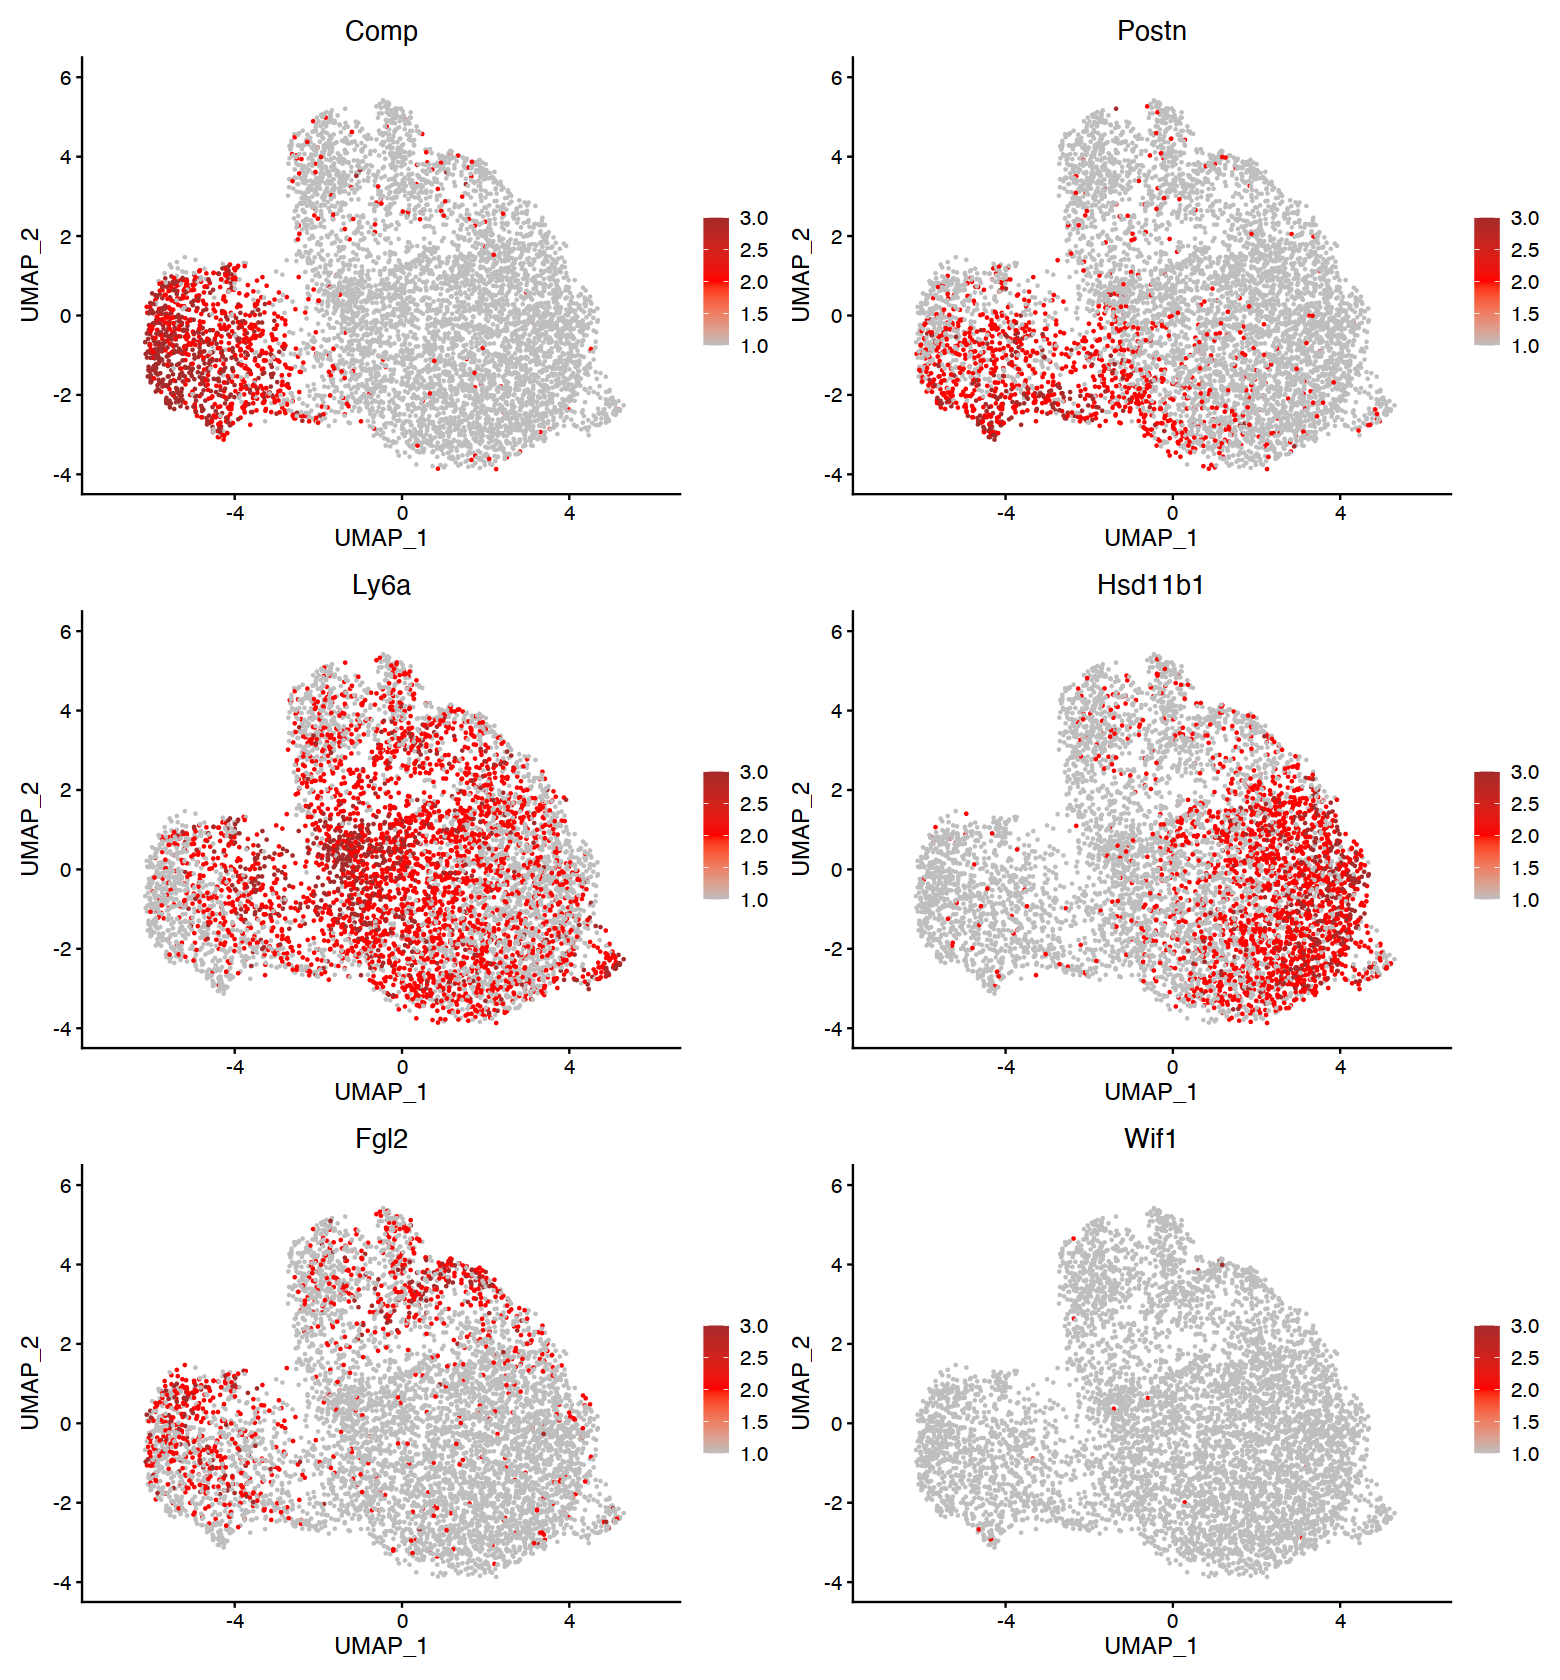

In [22]:
options(repr.plot.width=13, repr.plot.height=14)
FeaturePlot(mid30.fibroblasts, c("Comp", "Postn", "Ly6a", "Hsd11b1", "Fgl2", "Wif1"), 
            cols = c("grey", "red", "brown"))

# Label transfer analysis 

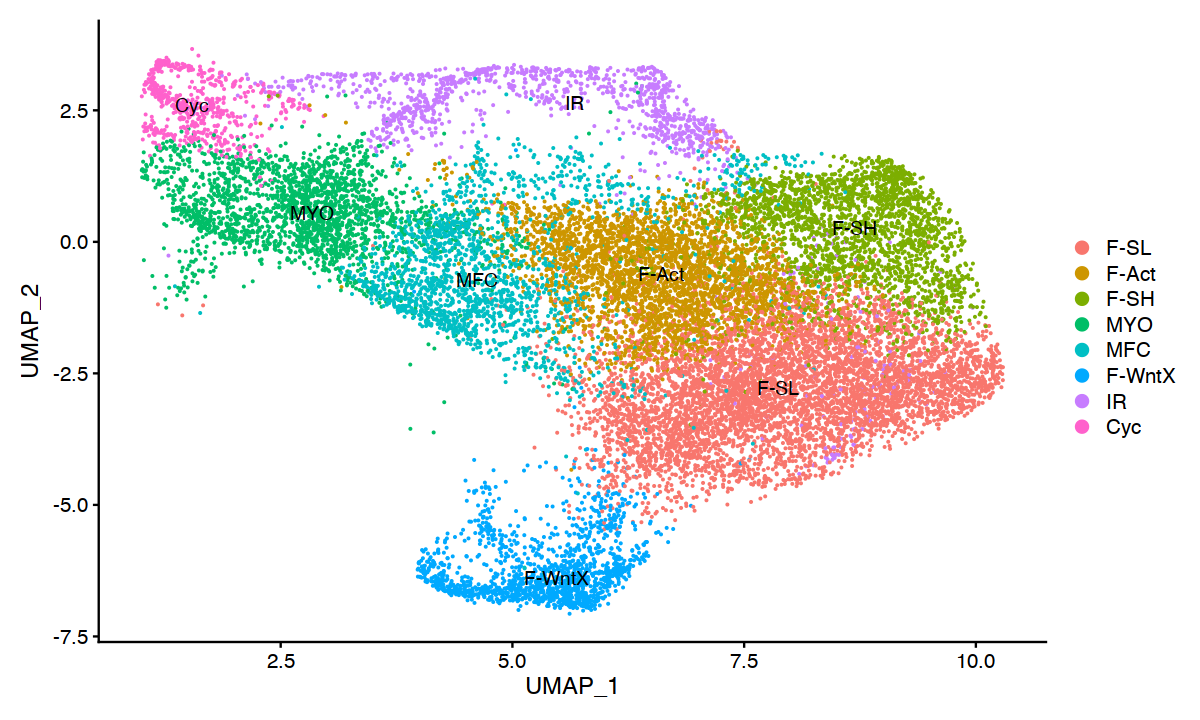

In [23]:
### Try using the Forte et al. MI time course data for transfer analysis 

load("../Forte/fibroblasts_Forte_MI_timecourse.RData")
forte.fibroblasts <- fibroblasts.seurat
remove(fibroblasts.seurat)

options(repr.plot.width=10, repr.plot.height=6)
DimPlot(forte.fibroblasts, label = TRUE)  

Regressing out nCount_RNA

Centering and scaling data matrix

PC_ 1 
Positive:  Gsn, Clec3b, Dpep1, Jund, Junb, Smoc2, Cebpd, Sparcl1, Klf4, Adamts5 
	   Fth1, Jun, Scara5, Cfh, Lpl, Pcsk6, Dusp1, Glul, Fos, Egr1 
	   Ly6a, Selenbp1, Pi16, Ifi205, G0s2, Tsc22d3, Klf2, Igfbp6, Socs3, Zfp36 
Negative:  Cthrc1, Acta2, Postn, Tagln, Stmn1, Csrp2, Ddah1, Fn1, Lgals1, Cks2 
	   Pclaf, Birc5, Col1a1, Tpm2, Cdca3, Cdca8, Lox, Spc24, Cenpa, Tpx2 
	   Actb, Cdk1, Cdc20, Ccna2, Ube2c, Ccnb2, Cenpm, Ccn4, Sparc, Tk1 
PC_ 2 
Positive:  Birc5, Pclaf, Cdca8, Ccna2, Cks2, Cdca3, Cdc20, Tpx2, Ube2c, Top2a 
	   Prc1, Pbk, Stmn1, Ccnb1, Cenpa, Spc24, Ccnb2, Cenpm, Pimreg, Tk1 
	   Spc25, Racgap1, Mki67, Tubb6, Cenpf, Cdkn3, Knstrn, Cdk1, Hmmr, Ckap2l 
Negative:  Comp, Ecrg4, Mfap4, Cst3, Fmod, Dkk3, Fxyd6, Ltbp2, Sfrp2, Ddah1 
	   Col8a2, Col1a2, Postn, Itgbl1, Cd200, Igfbp7, Pdgfrl, Cilp, Tgfb3, Rflnb 
	   Cpe, Mgp, Col1a1, Pdlim3, Timp3, Fn1, Cthrc1, Col5a2, Ccn5, Mdk 
PC_ 3 
Positive:  Mfap5, Pi16, Fs

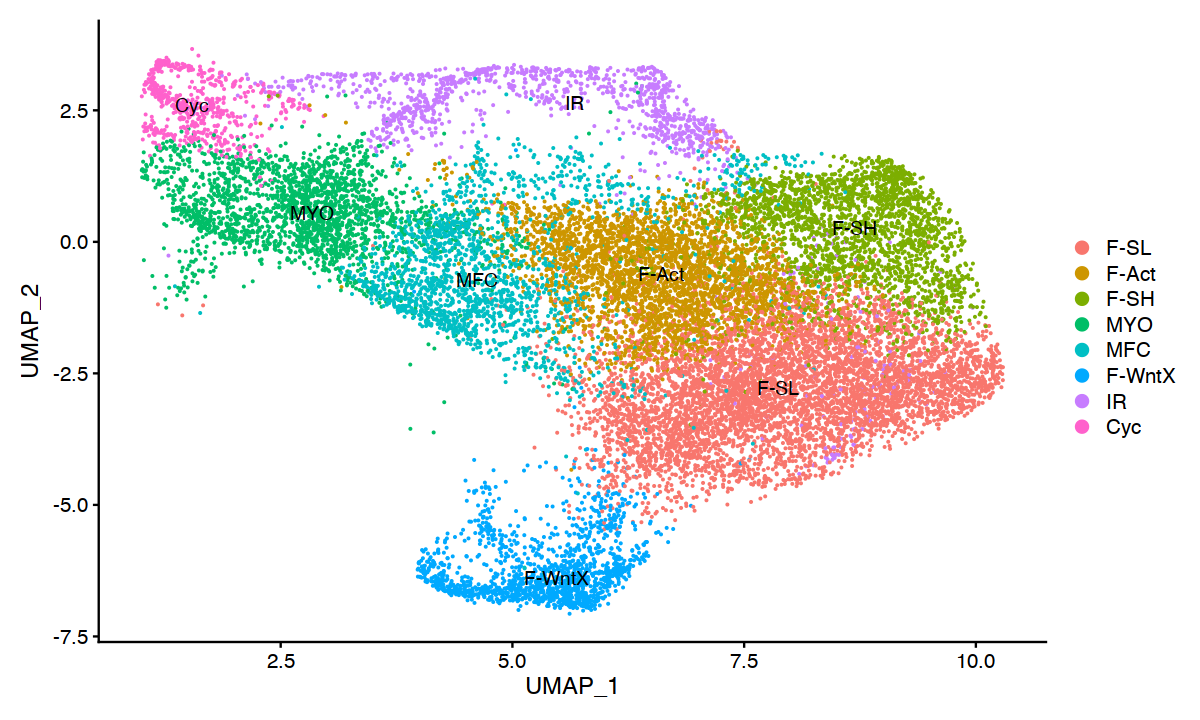

In [24]:
forte.fibroblasts <- FindVariableFeatures(object = forte.fibroblasts, 
                                          mean.function = "vst", 
                                          nfeatures = 2000)

forte.fibroblasts <- ScaleData(forte.fibroblasts, 
                               vars.to.regress = "nCount_RNA", 
                               verbose = TRUE)

forte.fibroblasts <- RunPCA(object = forte.fibroblasts, 
                            features = VariableFeatures(object = forte.fibroblasts), npcs=60)

DimPlot(forte.fibroblasts, reduction = 'umap', label = TRUE)

fibro.anchors <- FindTransferAnchors(reference = forte.fibroblasts, 
                                     query = mid30.fibroblasts, 
                                     dims = 1:30)
predictions <- TransferData(anchorset = fibro.anchors, 
                            refdata = Idents(forte.fibroblasts), 
                            dims = 1:30)
colnames(predictions) <- paste0("Forte_", colnames(predictions))
mid30.fibroblasts <- AddMetaData(mid30.fibroblasts, metadata = predictions)

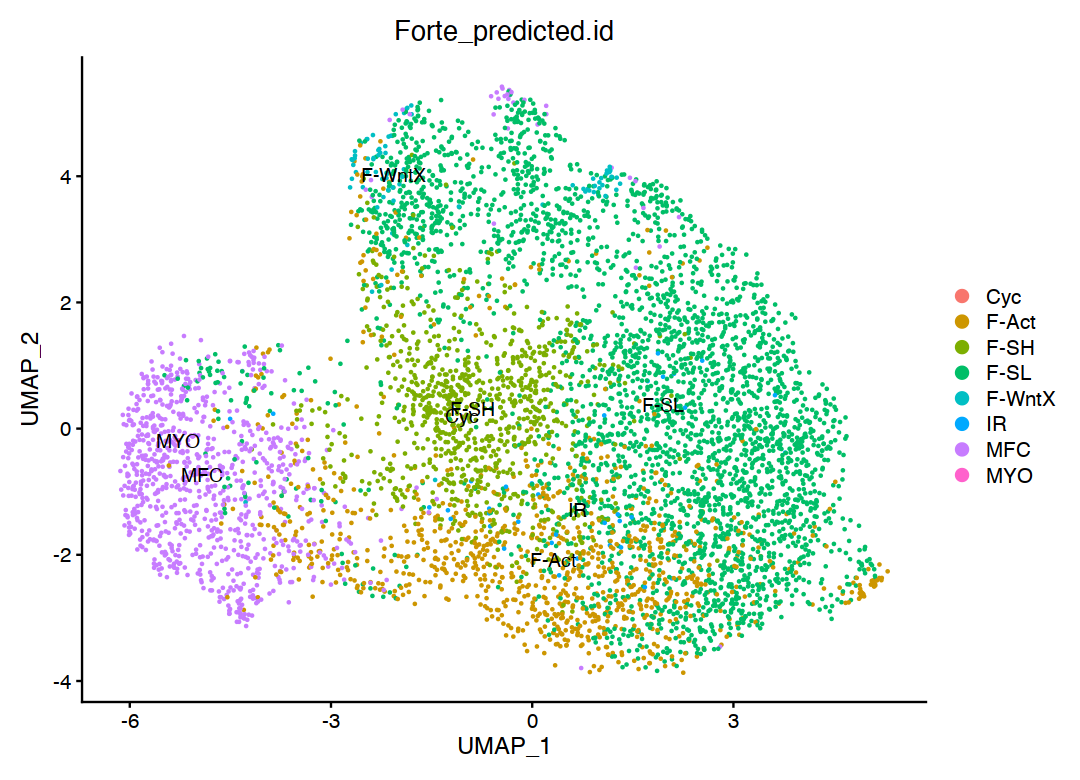

In [25]:
options(repr.plot.width=9, repr.plot.height=6.5)
DimPlot(mid30.fibroblasts, reduction = 'umap', group.by = "Forte_predicted.id", label = TRUE)

Putting it together, clusters 0 = F-SL, cluster 1 = F-Act, cluster 3 = MFC, cluster 4 = F-Trans and cluster 5 = F-SH

In [26]:
Idents(mid30.fibroblasts) <- mid30.fibroblasts@meta.data$RNA_snn_res.0.7

Idents(mid30.fibroblasts) <- plyr::mapvalues(Idents(mid30.fibroblasts), 
                                             from = c("0", "1", "2", "3", "4", "5"),
                                             to = c("F-SL", "F-Act", "MFC", "F-Trans",  "F-SH",
                                                      "F-Act"))
mid30.fibroblasts$FibroblastClusters <- Idents(mid30.fibroblasts)


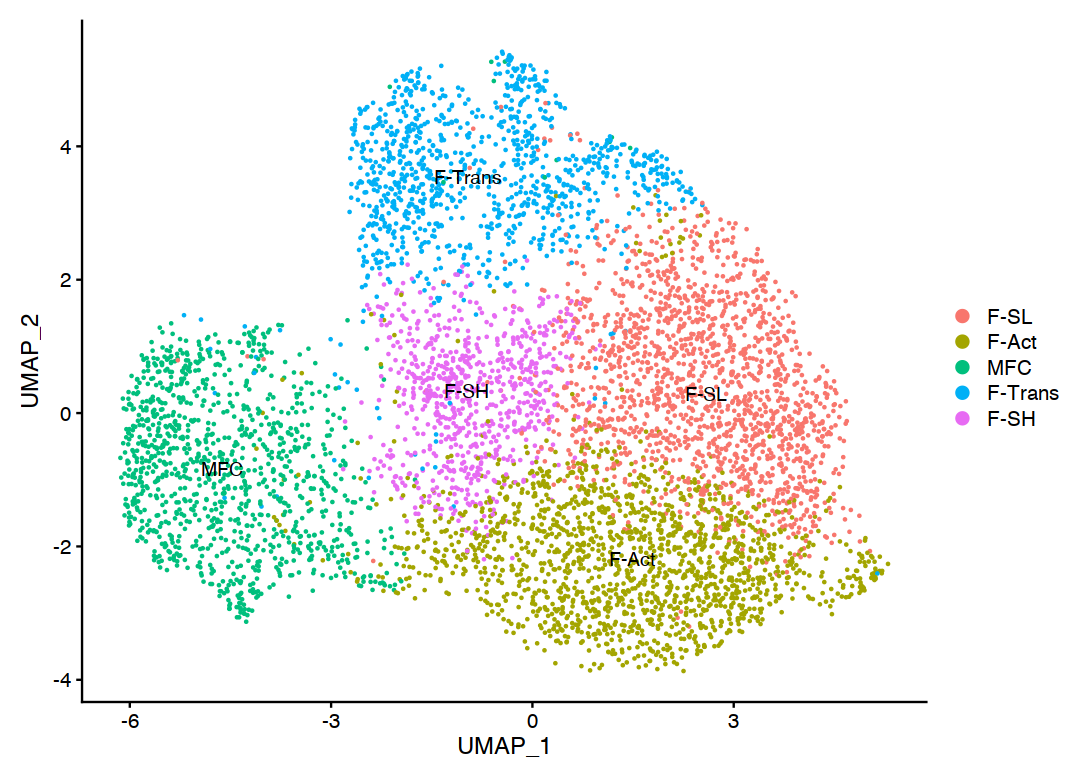

In [27]:
options(repr.plot.width=9, repr.plot.height=6.5)
DimPlot(mid30.fibroblasts, reduction = 'umap', label = TRUE)